In [ ]:


# Day 1 : Data Science Data access and Data Exploration

    Work with the kids to access the public data set
    visualize and get familar with the different chart/plots
Environment setup:
    install jupyter lab
    install miniconda
            pip install all the packages

In [2]:
import io
import warnings
import logging
import os
import ads
from ads.dataset.factory import DatasetFactory
from ads.common.auth import default_signer

import pandas as pd
import numpy as np
import seaborn as sns

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

warnings.filterwarnings('ignore')
logging.basicConfig(format='%(levelname)s:%(message)s', level=logging.ERROR)
print(f"done")

done


In [3]:
import pandas as pd
"""
url = "https://objectstorage.us-ashburn-1.oraclecloud.com/n/bigdatadatasciencelarge/b/hosted-ds-datasets/o/synthetic%2Forcl_attrition.csv"
df = pd.read_csv(url)
df.head()
"""
iris = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data",
                   header=None, names=["sepal_len","sepal_wid","petal_len","petal_wid","species"])
iris.info()
iris.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sepal_len  150 non-null    float64
 1   sepal_wid  150 non-null    float64
 2   petal_len  150 non-null    float64
 3   petal_wid  150 non-null    float64
 4   species    150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


,sepal_len,sepal_wid,petal_len,petal_wid,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
import ads

from ads.dataset.dataset_browser import DatasetBrowser
import pandas as pd

DatasetBrowser.list()

['web', 'sklearn', 'seaborn', 'GitHub']

In [6]:
sklearn = DatasetBrowser.sklearn()
sklearn.list()


['breast_cancer', 'diabetes', 'iris', 'wine', 'digits']

In [7]:
ds1 = sklearn.open('wine')
ds1.info()
ds1.head()


loop1:   0%|          | 0/4 [00:00<?, ?it/s]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   alcohol                       178 non-null    float64 
 1   malic_acid                    178 non-null    float64 
 2   ash                           178 non-null    float64 
 3   alcalinity_of_ash             178 non-null    float64 
 4   magnesium                     178 non-null    float64 
 5   total_phenols                 178 non-null    float64 
 6   flavanoids                    178 non-null    float64 
 7   nonflavanoid_phenols          178 non-null    float64 
 8   proanthocyanins               178 non-null    float64 
 9   color_intensity               178 non-null    float64 
 10  hue                           178 non-null    float64 
 11  od280/od315_of_diluted_wines  178 non-null    float64 
 12  proline                       178 non-null    floa

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,class_0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,class_0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,class_0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,class_0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,class_0


In [8]:
ds1.suggest_recommendations()

Code
Message                                                        Variables     Suggested                         Action                                                                            
Strongly correlated with flavanoids(86.46%.)                   total_phenols Drop total_phenols                Drop total_phenols                                .drop_columns(["total_phenols"])
                                                                                                               Drop flavanoids                                      .drop_columns(["flavanoids"])
                                                                                                               Do nothing                                                                        
Strongly correlated with od280/od315_of_diluted_wines(78.72%.) flavanoids    Drop od280/od315_of_diluted_wines Drop flavanoids                                      .drop_columns(["flavanoids"])
                                                                                                               Drop od280/od315_of_diluted_wines  .drop_columns(["od280/od315_of_diluted_wines"])
                                                                                                               Do nothing

In [10]:
transformed_ds1 = ds1.auto_transform()

loop1:   0%|          | 0/7 [00:00<?, ?it/s]

In [11]:
import os, sys, shutil, pathlib

print("Python:", sys.executable)
print("Conda prefix:", os.environ.get("CONDA_PREFIX"))
print("Conda default env:", os.environ.get("CONDA_DEFAULT_ENV"))
print("Is 'conda' on PATH?:", bool(shutil.which("conda")))
print("Kernel site-packages:", [p for p in sys.path if "site-packages" in p][:2])
print("Conda meta dir exists?:", pathlib.Path(sys.prefix, "conda-meta").exists())


Python: C:\Users\ytian\miniconda3\envs\localds2\python.exe
Conda prefix: C:\Users\ytian\miniconda3\envs\localds2
Conda default env: localds2
Is 'conda' on PATH?: True
Kernel site-packages: ['C:\\Users\\ytian\\miniconda3\\envs\\localds2\\Lib\\site-packages', 'C:\\Users\\ytian\\miniconda3\\envs\\localds2\\Lib\\site-packages\\win32']
Conda meta dir exists?: True



(process:33548): Pango-CRITICAL **: 18:06:08.920: pango_font_description_get_family: assertion 'desc != NULL' failed

(process:33548): Pango-CRITICAL **: 18:06:08.920: pango_font_description_get_family: assertion 'desc != NULL' failed

(process:33548): Pango-CRITICAL **: 18:06:08.920: pango_font_description_get_family: assertion 'desc != NULL' failed

(process:33548): Pango-CRITICAL **: 18:06:08.920: pango_font_description_get_family: assertion 'desc != NULL' failed

(process:33548): Pango-CRITICAL **: 18:06:08.920: pango_font_description_get_family: assertion 'desc != NULL' failed

(process:33548): Pango-CRITICAL **: 18:06:08.920: pango_font_description_get_family: assertion 'desc != NULL' failed

(process:33548): Pango-CRITICAL **: 18:06:08.920: pango_font_description_get_family: assertion 'desc != NULL' failed

(process:33548): Pango-CRITICAL **: 18:06:08.920: pango_font_description_get_family: assertion 'desc != NULL' failed


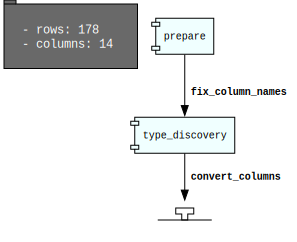

In [12]:
# Patch ADS's expectation that display/SVG are in IPython.core.display
from IPython.display import display, SVG
import IPython.core.display as _core_disp
_core_disp.display = display
_core_disp.SVG = SVG

#%pip install -q graphviz pydot
# Make graphviz.Source tolerant if it was constructed with a Digraph
from graphviz import Source, Digraph

def _source_iter_pathed(self):
    src = getattr(self, "_source", "")
    if isinstance(src, Digraph):
        src = src.source  # use the DOT text
    for line in src.splitlines(keepends=True):
        yield line

Source.__iter__ = _source_iter_pathed
ds1.visualize_transforms()


(process:33576): Pango-CRITICAL **: 18:06:29.398: pango_font_description_get_family: assertion 'desc != NULL' failed

(process:33576): Pango-CRITICAL **: 18:06:29.398: pango_font_description_get_family: assertion 'desc != NULL' failed

(process:33576): Pango-CRITICAL **: 18:06:29.398: pango_font_description_get_family: assertion 'desc != NULL' failed

(process:33576): Pango-CRITICAL **: 18:06:29.398: pango_font_description_get_family: assertion 'desc != NULL' failed

(process:33576): Pango-CRITICAL **: 18:06:29.398: pango_font_description_get_family: assertion 'desc != NULL' failed

(process:33576): Pango-CRITICAL **: 18:06:29.398: pango_font_description_get_family: assertion 'desc != NULL' failed

(process:33576): Pango-CRITICAL **: 18:06:29.398: pango_font_description_get_family: assertion 'desc != NULL' failed

(process:33576): Pango-CRITICAL **: 18:06:29.398: pango_font_description_get_family: assertion 'desc != NULL' failed


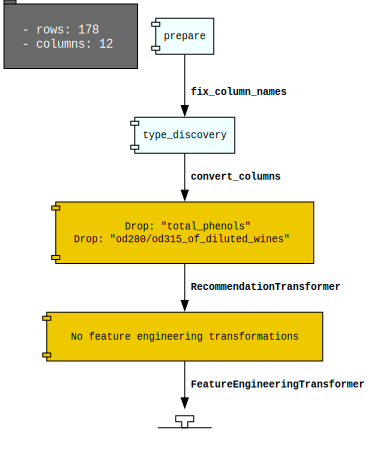

In [13]:

def _source_iter_pathed(self):
    src = getattr(self, "_source", "")
    if isinstance(src, Digraph):
        src = src.source  # use the DOT text
    for line in src.splitlines(keepends=True):
        yield line

Source.__iter__ = _source_iter_pathed
transformed_ds1.visualize_transforms()

# Categorical Encoder


In [14]:
transformed_ds1.head()
transformed_ds1['target'].value_counts()
transformed_ds1.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,proline,target
0,14.23,1.71,2.43,15.6,127.0,3.06,0.28,2.29,5.64,1.04,1065.0,class_0
1,13.20,1.78,2.14,11.2,100.0,2.76,0.26,1.28,4.38,1.05,1050.0,class_0
2,13.16,2.36,2.67,18.6,101.0,3.24,0.30,2.81,5.68,1.03,1185.0,class_0
3,14.37,1.95,2.50,16.8,113.0,3.49,0.24,2.18,7.80,0.86,1480.0,class_0
4,13.24,2.59,2.87,21.0,118.0,2.69,0.39,1.82,4.32,1.04,735.0,class_0


In [15]:
from ads.dataset.label_encoder import DataFrameLabelEncoder
ds_encoded = DataFrameLabelEncoder().fit_transform(transformed_ds1.to_pandas())
ds_encoded['target'].value_counts()


target
1    71
0    59
2    48
Name: count, dtype: int64

# upsample or downsample

In [16]:
from ads.dataset.helper import up_sample
ds_upsampled = up_sample(transformed_ds1, ['target'], sampler='default', feature_types=None)
ds_upsampled.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,proline,
0,14.23,1.71,2.43,15.6,127.0,3.06,0.28,2.29,5.64,1.04,1065.0,class_0
1,13.20,1.78,2.14,11.2,100.0,2.76,0.26,1.28,4.38,1.05,1050.0,class_0
2,13.16,2.36,2.67,18.6,101.0,3.24,0.30,2.81,5.68,1.03,1185.0,class_0
3,14.37,1.95,2.50,16.8,113.0,3.49,0.24,2.18,7.80,0.86,1480.0,class_0
4,13.24,2.59,2.87,21.0,118.0,2.69,0.39,1.82,4.32,1.04,735.0,class_0


In [19]:
ds_upsampled[''].value_counts()


class_0    71
class_1    71
class_2    71
Name: count, dtype: int64

In [20]:
ds1['target'].value_counts()

target
class_1    71
class_0    59
class_2    48
Name: count, dtype: int64

# Split data 

In [21]:
data_split = transformed_ds1.train_validation_test_split(
    test_size=0.10,
    validation_size=0.10
)
train, validation, test = data_split
print(data_split)

(Train Data
Shape of X:(144, 11)
Shape of y:(144,), Validation Data
Shape of X:(16, 11)
Shape of y:(16,), Test Data
Shape of X:(18, 11)
Shape of y:(18,))


loop1:   0%|          | 0/4 [00:00<?, ?it/s]

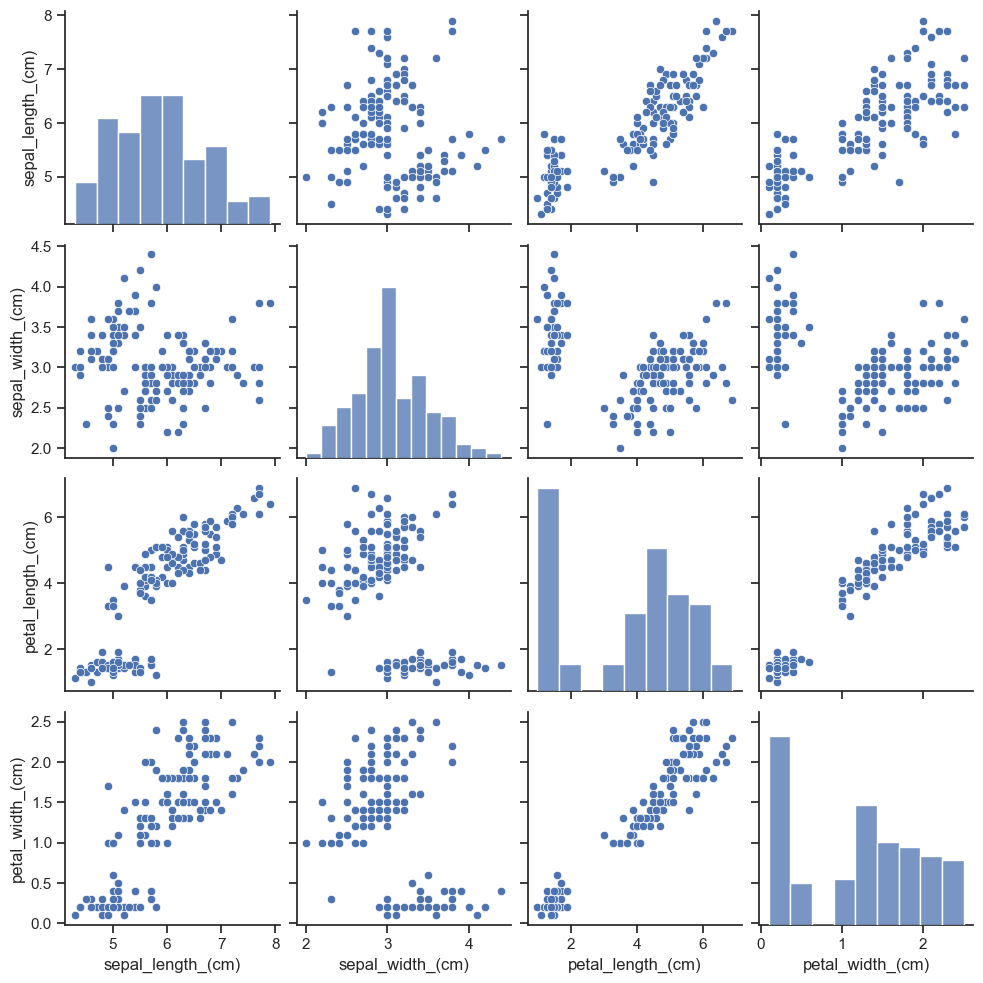

In [22]:
import seaborn as sns
from sklearn.datasets import load_iris
from ads.dataset.factory import DatasetFactory
data = load_iris()
iris_df = pd.DataFrame(data.data, columns=data.feature_names)
sns.set(style="ticks", color_codes=True)
DatasetFactory.from_dataframe(iris_df).call(lambda df: sns.pairplot(df.dropna()))


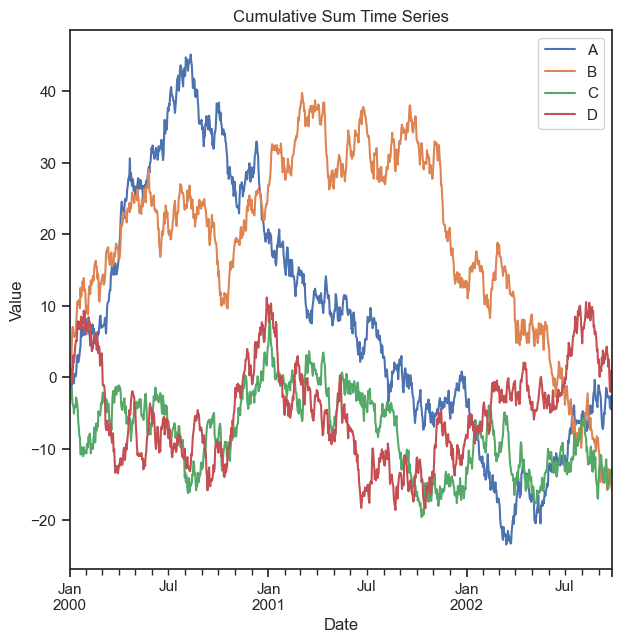

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# %matplotlib inline  # (optional in Jupyter)

# ---- sample data ----
df = pd.DataFrame(np.random.randn(1000, 4), columns=list('ABCD'))

# ---- plotting function ----
def ts_plot(df_in, figsize=(7, 7)):
    # build a matching datetime index
    ts = pd.date_range('2000-01-01', periods=len(df_in), freq='D')

    # work on a copy so we don't mutate the original
    df2 = df_in.copy()
    df2.index = ts

    # cumulative sum for a nicer time-series shape
    df2 = df2.cumsum()

    # plot
    fig, ax = plt.subplots(figsize=figsize)
    df2.plot(ax=ax)
    ax.legend(loc='best')
    ax.set_title('Cumulative Sum Time Series')
    ax.set_xlabel('Date')
    ax.set_ylabel('Value')
    plt.show()

# ---- EITHER call directly ----
ts_plot(df, figsize=(7, 7))


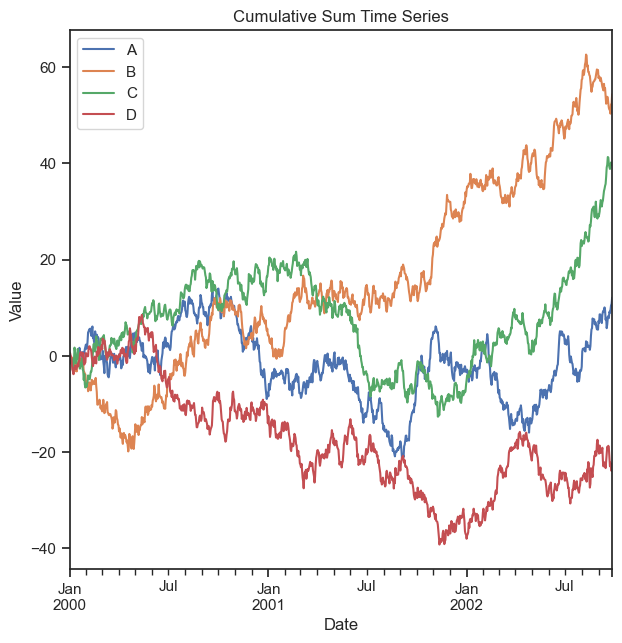

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame(np.random.randn(1000, 4), columns=list('ABCD'))

def ts_plot(df_in, figsize=(7,7)):
    #ts= pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000',periods=1000))
    df2 = df_in.copy()
    ts = pd.date_range('2000-01-01', periods=len(df_in), freq='D')
    
    #df_in.set_index(ts)
    df2.index = ts
    df2 = df2.cumsum()

    fig, ax = plt.subplots(figsize=figsize)
    
   # plt.figure()
    df2.plot(ax=ax)
    ax.legend(loc='best')
    #plt.legend(loc='best')
    ax.set_title("Cumulative Sum Time Series")
    ax.set_xlabel('Date')
    ax.set_ylabel('Value')
    plt.show()

ts_plot(df, figsize=(7,7))

#ds = DatasetFactory.from_dataframe(df, target='A')
#ds.call(ts_plot, figsize=(7,7))

time    datetime64[ns]
dtype: object


loop1:   0%|          | 0/4 [00:00<?, ?it/s]

ERROR - Exception
Traceback (most recent call last):
  File "C:\Users\ytian\miniconda3\envs\localds2\Lib\site-packages\IPython\core\interactiveshell.py", line 3699, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\ytian\AppData\Local\Temp\ipykernel_14344\3455512748.py", line 30, in <module>
    fig.show()
    ^^^^^^^^
AttributeError: 'NoneType' object has no attribute 'show'
AttributeError: 'NoneType' object has no attribute 'show'

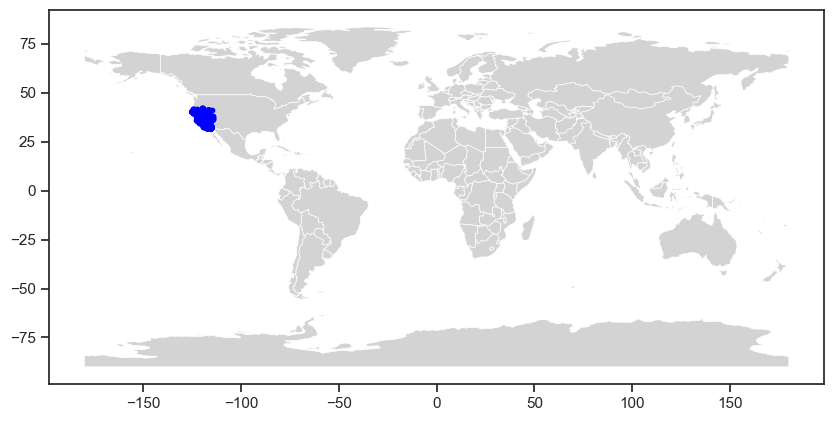

In [27]:
import pandas as pd
from ads.dataset.factory import DatasetFactory

url = (
    "https://earthquake.usgs.gov/fdsnws/event/1/query?"
    "format=csv"
    "&starttime=2024-01-01&endtime=2025-10-07"     # adjust dates
    "&minmagnitude=2.5"
    "&minlatitude=32&maxlatitude=42.1"             # CA lat range
    "&minlongitude=-125&maxlongitude=-114"         # CA lon range
    "&orderby=time-asc"
)
ca_eq = pd.read_csv(url)
ca_eq.head()

# 1) Load (already done in your notebook) and normalize datetime columns to naive UTC
for col in ("time", "updated"):
    if col in ca_eq.columns:
        s = pd.to_datetime(ca_eq[col], errors="coerce", utc=True)
        # drop timezone info, keep UTC clock time
        ca_eq[col] = s.dt.tz_convert(None)

print(ca_eq[["time"]].dtypes)  # should show datetime64[ns] (no timezone)

ds = DatasetFactory.from_dataframe(ca_eq)
fig = ds.plot_gis_scatter(
    lon="longitude",
    lat="latitude"
)
fig.show()

